In [20]:
import pandas as pd

In [21]:
file = 'data/sw_reviews.csv'

In [22]:
df = pd.read_csv(file, encoding="UTF-8")

In [23]:
df.head()

,Unnamed: 0,reviews
0,0,✅ Trip Verified | Round trip to DCA for a we...
1,1,Not Verified | I purchased airfare for my fa...
2,2,✅ Trip Verified | Will never fly Southwest ag...
3,3,✅ Trip Verified | My wife and my 3 children t...
4,4,Not Verified | Never again! Don't fly Southwe...


In [24]:
df['reviews'] = df['reviews'].str.split('|',expand=True)[1]

In [25]:
df.head()

,Unnamed: 0,reviews
0,0,Round trip to DCA for a wedding. Both outbo...
1,1,I purchased airfare for my family traveling...
2,2,Will never fly Southwest again after today. ...
3,3,My wife and my 3 children traveled from Atla...
4,4,Never again! Don't fly Southwest out of Char...


In [26]:
df.reviews[4]

"  Never again! Don't fly Southwest out of Charlotte. No kiosks, you stand in line for an hour to get a boarding pass. 2 agents checking people in, which is absurd. I paid extra to board in A group, only to get on the plane to find people savings seats for others that didn't pay. No enforcement of that not being allowed.  Southwest sucks now."

## Cleaning 

In [28]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['reviews'] = df['reviews'].apply(clean)
df.head()

,Unnamed: 0,reviews
0,0,Round trip to DCA for a wedding Both outbound...
1,1,I purchased airfare for my family traveling w...
2,2,Will never fly Southwest again after today Aw...
3,3,My wife and my children traveled from Atlanta...
4,4,Never again Don t fly Southwest out of Charlo...


In [32]:
column_to_drop = ['Unnamed: 0']
df = df.drop(columns=column_to_drop, axis=1)


In [33]:
df.head()

,reviews
0,Round trip to DCA for a wedding Both outbound...
1,I purchased airfare for my family traveling w...
2,Will never fly Southwest again after today Aw...
3,My wife and my children traveled from Atlanta...
4,Never again Don t fly Southwest out of Charlo...


### Tokenization

Tokenization is the process of breaking the text into smaller pieces called Tokens. 
It can be performed at sentences(sentence tokenization) or word level(word tokenization).

### Pos tagging 

Parts of Speech (POS) tagging is a process of converting each token into a tuple having the form (word, tag). POS tagging essential to preserve the context of the word and is essential for Lemmatization.

### Stopwords removal

Stopwords in English are words that carry very little useful information. We need to remove them as part of text preprocessing. 
nltk has a list of stopwords of every language.

### Obtaining stem words

A stem is a part of a word responsible for its lexical meaning. The two popular techniques of obtaining the root/stem words are Stemming and Lemmatization.
The key difference is Stemming often gives some meaningless root words as it simply chops off some characters in the end. Lemmatization gives meaningful root words, however, it requires POS tags of the words.

### Natural Language Toolkit

NLTK is a leading platform for building Python programs to work with human language data. 
It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, 
along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, 
and semantic reasoning, wrappers for industrial-strength NLP libraries, and an active discussion forum.

https://www.nltk.org/ <br>
https://realpython.com/nltk-nlp-python/#getting-started-with-pythons-nltk

In [38]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, 
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/marinamukhranski/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/marinamukhranski/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/marinamukhranski/nltk_data...


In [39]:
#The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora.


nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/marinamukhranski/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/marinamukhranski/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,reviews,POS tagged
0,Round trip to DCA for a wedding Both outbound...,"[(Round, r), (trip, n), (DCA, n), (wedding, n)..."
1,I purchased airfare for my family traveling w...,"[(purchased, v), (airfare, n), (family, n), (t..."
2,Will never fly Southwest again after today Aw...,"[(never, r), (fly, v), (Southwest, n), (today,..."
3,My wife and my children traveled from Atlanta...,"[(wife, n), (children, n), (traveled, v), (Atl..."
4,Never again Don t fly Southwest out of Charlo...,"[(Never, r), (fly, n), (Southwest, n), (Charlo..."


In [40]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,POS tagged,Lemma
0,Round trip to DCA for a wedding Both outbound...,"[(Round, r), (trip, n), (DCA, n), (wedding, n)...",Round trip DCA wedding outbound inbound flig...
1,I purchased airfare for my family traveling w...,"[(purchased, v), (airfare, n), (family, n), (t...",purchase airfare family travel small child p...
2,Will never fly Southwest again after today Aw...,"[(never, r), (fly, v), (Southwest, n), (today,...",never fly Southwest today Awful people rude ...
3,My wife and my children traveled from Atlanta...,"[(wife, n), (children, n), (traveled, v), (Atl...",wife child travel Atlanta Fort Lauderdale st...
4,Never again Don t fly Southwest out of Charlo...,"[(Never, r), (fly, n), (Southwest, n), (Charlo...",Never fly Southwest Charlotte kiosk stand li...


## Sentiment Analysis using VADER

Sentiment Analysis using VADER Valence Aware Dictionary and Sentiment Reasoner.
Vader sentiment not only tells if the statement is positive or negative along with the intensity of emotion.
VADER is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media, and works well on texts from other domains.
https://github.com/cjhutto/vaderSentiment

In [44]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,POS tagged,Lemma,Sentiment,Analysis
0,Round trip to DCA for a wedding Both outbound...,"[(Round, r), (trip, n), (DCA, n), (wedding, n)...",Round trip DCA wedding outbound inbound flig...,0.6597,Positive
1,I purchased airfare for my family traveling w...,"[(purchased, v), (airfare, n), (family, n), (t...",purchase airfare family travel small child p...,0.2783,Neutral
2,Will never fly Southwest again after today Aw...,"[(never, r), (fly, v), (Southwest, n), (today,...",never fly Southwest today Awful people rude ...,-0.8020,Negative
3,My wife and my children traveled from Atlanta...,"[(wife, n), (children, n), (traveled, v), (Atl...",wife child travel Atlanta Fort Lauderdale st...,0.5256,Positive
4,Never again Don t fly Southwest out of Charlo...,"[(Never, r), (fly, n), (Southwest, n), (Charlo...",Never fly Southwest Charlotte kiosk stand li...,-0.4215,Negative


In [45]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Negative    505
Positive    368
Neutral     127
Name: Analysis, dtype: int64

## Visual representation

([<matplotlib.patches.Wedge at 0x7fecb0c13250>,
 [Text(-0.01727803256672635, 1.0998642959886566, 'Negative'),
  Text(-0.4113551545846278, -1.0201896572680282, 'Positive'),
  Text(1.2439667284310878, -0.5244490237920707, 'Neutral')],
 [Text(-0.009424381400032553, 0.5999259796301762, '50.5%'),
  Text(-0.22437553886434242, -0.5564670857825608, '36.8%'),
  Text(0.7832383104936479, -0.33020864460982224, '12.7%')])

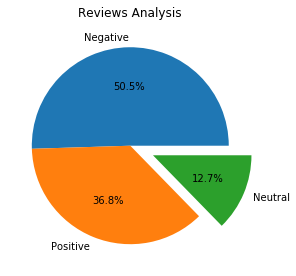

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [48]:
df.to_csv("SouthWest_reviews.csv")

### Wordcloud

https://github.com/amueller/word_cloud

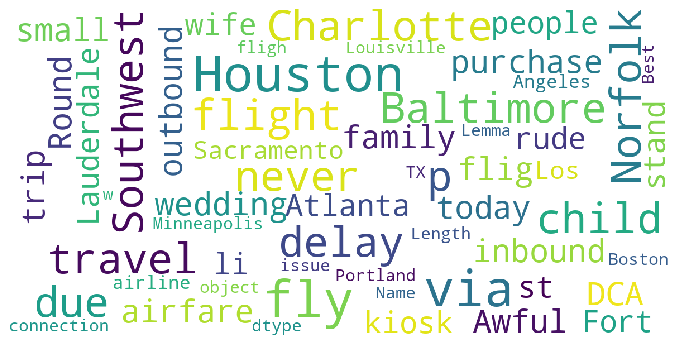

In [50]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)